In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',100)

groups_df = pd.read_csv("Group_Comparisons_Sheet.csv",index_col=0 )

groups_df.sort_values(by='basket_size_L_sum', axis=1, ascending=True, inplace=True)

/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in arctanh
  after removing the cwd from sys.path.


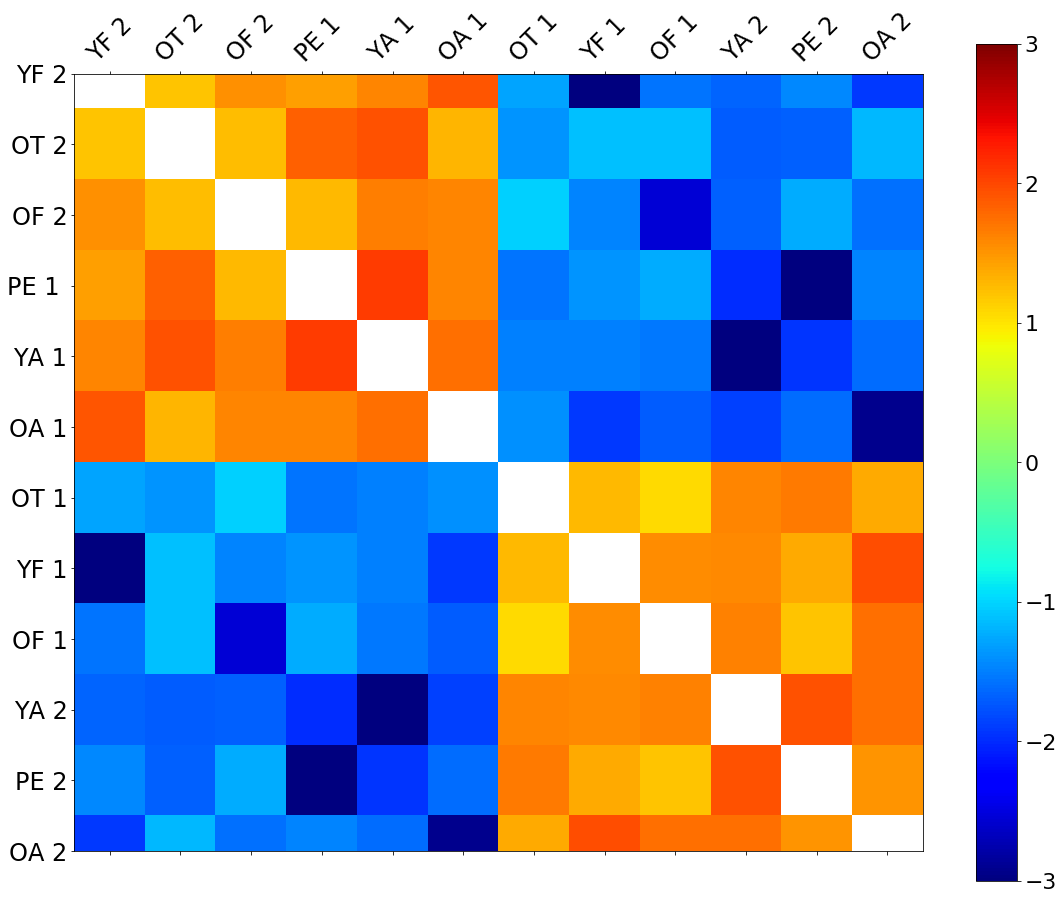

In [3]:
#plt.matshow(groups_df.corr())
#plt.show()

Z_val = np.arctanh(groups_df.corr().values)
f = plt.figure(figsize=(19, 15))

plt.matshow(Z_val, fignum=f.number, cmap='jet',vmin=-3, vmax=3)

plt.xticks(np.arange(groups_df.shape[1]), groups_df.columns, fontsize=24, rotation=45)
plt.yticks(np.arange(groups_df.shape[1]), groups_df.columns, fontsize=24)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=22)
#plt.title('Correlation Matrix', fontsize=24);

In [4]:
groups_df.head()

,YF 2,OT 2,OF 2,PE 1,YA 1,OA 1,OT 1,YF 1,OF 1,YA 2,PE 2,OA 2
basket_type_Small Shop_sum,2.476273,2.459226,1.317988,1.057904,1.070201,0.938423,-0.682045,-0.731941,-1.617018,-2.236613,-2.203630,-2.185328
basket_size_S_sum,2.039371,2.343118,1.030026,0.875769,0.905151,0.719904,-0.749465,-0.605376,-1.271603,-1.919316,-1.844078,-1.688106
basket_size_M_sum,1.611246,1.446056,1.020027,0.760696,0.587524,0.704132,-0.271306,-0.467812,-1.221748,-1.219238,-1.542094,-1.680608
basket_dominant_mission_Grocery_sum,0.860643,0.752273,0.337143,0.387893,0.412918,0.390216,-0.271317,-0.295094,-0.567558,-0.827054,-0.784276,-0.886469
basket_size_S_max,0.191894,1.618175,0.072670,0.570579,0.374883,0.074229,-0.213218,-0.005454,0.144331,-0.591485,-1.104105,0.034198


In [5]:
type(groups_df.corr())

pandas.core.frame.DataFrame

In [6]:
groups_df.corr().values

array([[ 1.        ,  0.83462606,  0.91213162,  0.89445538,  0.92095917,
         0.957191  , -0.85561209, -0.99634506, -0.91670646, -0.93007598,
        -0.89522153, -0.95695015],
       [ 0.83462606,  1.        ,  0.84796359,  0.95182769,  0.95848427,
         0.86391146, -0.87727473, -0.80536073, -0.80473073, -0.93505442,
        -0.9317122 , -0.82455156],
       [ 0.91213162,  0.84796359,  1.        ,  0.85634433,  0.92921634,
         0.92144317, -0.77311641, -0.9002116 , -0.98779848, -0.93155326,
        -0.84086476, -0.91800169],
       [ 0.89445538,  0.95182769,  0.85634433,  1.        ,  0.96870027,
         0.92101851, -0.91648732, -0.87624826, -0.84142321, -0.96213997,
        -0.99613603, -0.89958091],
       [ 0.92095917,  0.95848427,  0.92921634,  0.96870027,  1.        ,
         0.94154504, -0.90509276, -0.90452962, -0.91065556, -0.99503304,
        -0.95965053, -0.92202164],
       [ 0.957191  ,  0.86391146,  0.92144317,  0.92101851,  0.94154504,
         1.        , -

In [7]:
Z_val

array([[        inf,  1.20319338,  1.54006697,  1.44377644,  1.59530768,
         1.91125863, -1.27673321, -3.15149631, -1.56799629, -1.65895269,
        -1.44762135, -1.90839191],
       [ 1.20319338,         inf,  1.24885976,  1.85086858,  1.92692686,
         1.30856338, -1.36381406, -1.11368387, -1.11189361, -1.6971705 ,
        -1.67121545, -1.17087215],
       [ 1.54006697,  1.24885976,         inf,  1.27947259,  1.65262051,
         1.59850476, -1.02802845, -1.4733343 , -2.54661108, -1.67001192,
        -1.22411816, -1.57617022],
       [ 1.44377644,  1.85086858,  1.27947259,         inf,  2.07075962,
         1.59569861, -1.56662541, -1.35937599, -1.22602755, -1.97394748,
        -3.12363654, -1.47001815],
       [ 1.59530768,  1.92692686,  1.65262051,  2.07075962,         inf,
         1.75149136, -1.499693  , -1.49658715, -1.53135136, -2.9978039 ,
        -1.94147154, -1.60235074],
       [ 1.91125863,  1.30856338,  1.59850476,  1.59569861,  1.75149136,
                inf, -

In [30]:
print(groups_df.corr()[['YA 1']].sort_values(by ='YA 1', ascending=False))

           YA 1
YA 1   1.000000
PE 1   0.968700
OT 2   0.958484
OA 1   0.941545
OF 2   0.929216
YF 2   0.920959
YF 1  -0.904530
OT 1  -0.905093
OF 1  -0.910656
OA 2  -0.922022
PE 2  -0.959651
YA 2  -0.995033
